In [2]:
import cv2
import os
from PIL import Image
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import normalize
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

In [3]:
# Set the directory where the images are located
image_directory = 'Dataset/'

# Get the list of images without tumor
no_tumor_images = os.listdir(image_directory + 'no/')

# Get the list of images with tumor
yes_tumor_images = os.listdir(image_directory + 'yes/')

# Print the list of images without tumor
#print(no_tumor_images)

In [4]:
input_size = 64
dataset_x = []
label_y = []

# Process images without tumors
for i, image_name in enumerate(no_tumor_images):
    # Check if image is in jpg format
    if image_name.split('.')[1] == 'jpg':
        # Read image from directory
        image = cv2.imread(image_directory + 'no/' + image_name)
        # Convert image to RGB format
        image = Image.fromarray(image, 'RGB')
        # Resize image to specified input size
        image = image.resize((input_size, input_size))
        # Convert image to numpy array
        dataset_x.append(np.array(image))
        # Append label for no tumor
        label_y.append(0)

# Process images with tumors
for i, image_name in enumerate(yes_tumor_images):
    # Check if image is in jpg format
    if image_name.split('.')[1] == 'jpg':
        # Read image from directory
        image = cv2.imread(image_directory + 'yes/' + image_name)
        # Convert image to RGB format
        image = Image.fromarray(image, 'RGB')
        # Resize image to specified input size
        image = image.resize((input_size, input_size))
        # Convert image to numpy array
        dataset_x.append(np.array(image))
        # Append label for tumor
        label_y.append(1)

In [5]:
# Convert dataset_x to a numpy array
dataset_x = np.array(dataset_x)

# Convert label_y to a numpy array
label_y = np.array(label_y)

In [6]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(dataset_x, label_y, test_size=0.2, random_state=0)

# Normalize the training set
x_train = normalize(x_train, axis=1)

# Normalize the testing set
x_test = normalize(x_test, axis=1)

MDOEL BUILDING

In [7]:
# Import necessary libraries
from keras.models import Sequential
from keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense, Dropout

# Create a sequential model
model = Sequential()

# Add a convolutional layer with 32 filters, kernel size (3,3), and input shape (input_size, input_size, 3)
model.add(Conv2D(32, (3,3), input_shape =(input_size, input_size,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Add another convolutional layer with 32 filters, kernel size (3,3), and 'he_uniform' kernel initializer
model.add(Conv2D(32, (3,3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Add another convolutional layer with 64 filters, kernel size (3,3), and 'he_uniform' kernel initializer
model.add(Conv2D(64, (3,3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten the output from the previous layer
model.add(Flatten())

# Add a fully connected layer with 64 units
model.add(Dense(64))
model.add(Activation('relu'))

# Add a dropout layer with dropout rate of 0.5
model.add(Dropout(0.5))

# Add the output layer with 1 unit and sigmoid activation function
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [8]:
# Compiling the model
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(), 
    optimizer='adam', 
    metrics=['accuracy']
)

# Training the model
model.fit(
    x_train, 
    y_train, 
    batch_size=16,
    verbose=1, 
    epochs=10, 
    validation_data=(x_test, y_test),
    shuffle=False
)

# Saving the model
model.save('Brain_Tumor_Detection_1.0.h5')
tf.saved_model.save(model, 'C:\BRA FAMOUS\PROGRAMMING\PYTHON\PYTHON PROJECTS\Brain Tumour Detection\BTD Dataset')

Epoch 1/10
150/150 [==============================] - 6s 34ms/step - loss: 0.5546 - accuracy: 0.7312 - val_loss: 0.4906 - val_accuracy: 0.7633
Epoch 2/10
150/150 [==============================] - 5s 31ms/step - loss: 0.4204 - accuracy: 0.8275 - val_loss: 0.3712 - val_accuracy: 0.8283
Epoch 3/10
150/150 [==============================] - 5s 31ms/step - loss: 0.3155 - accuracy: 0.8750 - val_loss: 0.2810 - val_accuracy: 0.8800
Epoch 4/10
150/150 [==============================] - 5s 32ms/step - loss: 0.2360 - accuracy: 0.9096 - val_loss: 0.2063 - val_accuracy: 0.9100
Epoch 5/10
150/150 [==============================] - 5s 31ms/step - loss: 0.1627 - accuracy: 0.9404 - val_loss: 0.1419 - val_accuracy: 0.9467
Epoch 6/10
150/150 [==============================] - 5s 31ms/step - loss: 0.1014 - accuracy: 0.9688 - val_loss: 0.1044 - val_accuracy: 0.9567
Epoch 7/10
150/150 [==============================] - 5s 31ms/step - loss: 0.0735 - accuracy: 0.9762 - val_loss: 0.1025 - val_accuracy: 0.9683

INFO:tensorflow:Assets written to: C:\BRA FAMOUS\PROGRAMMING\PYTHON\PYTHON PROJECTS\Brain Tumour Detection\BTD Dataset\assets


INFO:tensorflow:Assets written to: C:\BRA FAMOUS\PROGRAMMING\PYTHON\PYTHON PROJECTS\Brain Tumour Detection\BTD Dataset\assets


MODEL SUMMARY

In [9]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 activation (Activation)     (None, 62, 62, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 29, 29, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                    

 1/19 [>.............................] - ETA: 0s

19/19 [==============================] - 0s 16ms/step


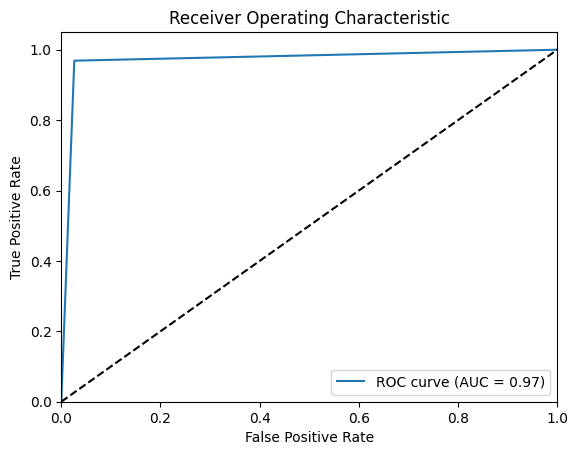

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have the model, x_test, and y_test available

# Make predictions on the test set
y_pred = model.predict(x_test)

# Define a threshold value
threshold = 0.5

# Apply thresholding to the predictions
y_pred = np.where(y_pred >= threshold, 1, 0)
y_pred=np.array(y_pred)

# Compute the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Compute the Area Under the Curve (AUC)
auc_score = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

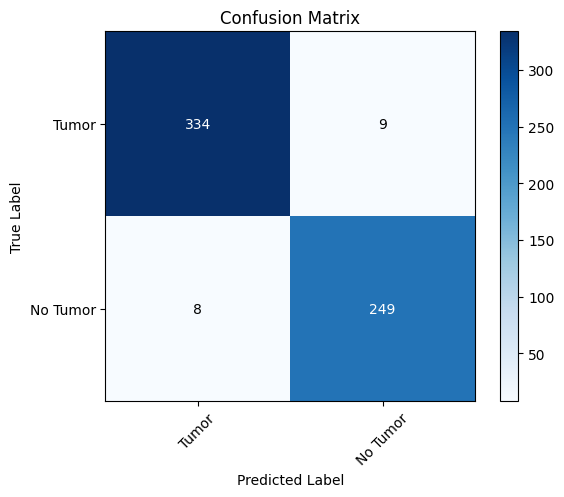

In [46]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have the predicted labels and true labels for your model
# predicted_labels: array-like of shape (n_samples,)
# true_labels: array-like of shape (n_samples,)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define the class labels (if known)
class_labels = ['Tumor','No Tumor']  # Replace with your class labels

# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')



# Add text annotations for each cell
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")


plt.show()


In [ ]:
y_pred= y_pred.argmax(axis=-1)

In [ ]:
print(y_pred)